In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread("landscape.jpg")

In [6]:
land_copy = img.copy()

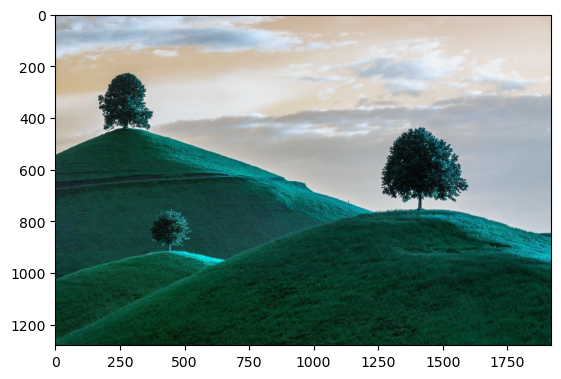

In [7]:
plt.imshow(land_copy)

In [8]:
marker_img = np.zeros(img.shape[:2], dtype=np.int32)

In [9]:
marker_img.shape

(1280, 1920)

In [10]:
segments = np.zeros(img.shape, dtype=np.uint8)

In [11]:
segments.shape

(1280, 1920, 3)

In [12]:
from matplotlib import cm

In [13]:
def create_rgb(i):
    return tuple(np.array(cm.tab10(i)[:3])*255)

In [14]:
colors = []
for i in range(10):
    colors.append(create_rgb(i))

In [15]:
colors

[(31.0, 119.0, 180.0),
 (255.0, 127.0, 14.0),
 (44.0, 160.0, 44.0),
 (214.0, 39.0, 40.0),
 (148.0, 103.0, 189.0),
 (140.0, 86.0, 75.0),
 (227.0, 119.0, 194.0),
 (127.0, 127.0, 127.0),
 (188.0, 189.0, 34.0),
 (23.0, 190.0, 207.0)]

In [16]:
n_markers = 10 # 0-9 
# RENK SEÇİMİ
current_marker = 1
# WATERSHED İLE MARKER GÜNCELLEMESİNİ TUTMAK İÇİN 
marks_updated = False

In [17]:
def mouse_callback(event,x,y,params):
    global marks_updated

    if event == cv2.EVENT_LBUTTONDOWN:
        # WATERSHED ALGORİTMASINA GEÇİLECEK OLAN MARKERLAR
        cv2.circle(marker_img, (x,y), 10, current_marker, -1)

        # KULLANICININ RESİMDE GÖRDÜĞÜ
        cv2.circle(land_copy, (x,y), colors[current_marker], -1)

        marks_updated = True

In [ ]:
cv2.namedWindow('Road Image')
cv2.setMouseCallback('Road Image', mouse_callback)

while True:

    cv2.imshow('Watershed Segments', segments)
    cv2.imshow('Road Image', road_copy)

    k = cv2.waitKey(1)

    if k == 27:
        break

    # EKRANI TEMİZLEMEK İÇİN 
    elif k == ord('c'):
        road_copy = img.copy()
        marker_img = np.zeros(img.shape[:2], dtype=np.int32)
        segments = np.zeros(img.shape, dtype=np.uint8)

    # RENK SEÇİMİNİ GÜNCELLEME 
    elif k > 0 and chr(k).isdigit():
        current_marker = int(chr(k))

    # MARKERLARI GÜNCELLEME 
    if marks_updated:

        marker_img_copy = marker_img.copy()
        cv2.watershed(img, marker_img_copy)

        segments = np.zeros(img.shape, dtype=np.uint8)

        for color_ind in range(n_markers):
            segments[marker_img_copy==(color_ind)] = colors[color_ind]


cv2.destroyAllWindows()